In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/Trade_Lifecycle_Data.csv")
df.head()

In [ ]:
df.info()
df.describe()

df.isnull().sum()

df.head()

In [ ]:
df['TradeDate'] = pd.to_datetime(df['TradeDate'], errors='coerce')
df['SettleDate'] = pd.to_datetime(df['SettleDate'], errors='coerce')

df = df.dropna(subset= ['TradeDate', 'SettleDate'])

df['TradeValue'] = pd.to_numeric(df['TradeValue'], errors='coerce')

df=df[df['TradeValue']>0]
df['AssetType'] = df['AssetType'].str.strip().str.title()
df['Status'] = df['Status'].str.strip().str.title()

df.info()
df.head()

In [ ]:
df['SettlementDuration'] = (df['SettleDate'] - df['TradeDate']).dt.days
df['SettledFlag'] = np.where(df['Status'] == 'Settled',1,0)
df['FailedFlag'] = np.where(df['Status']== 'Failed',1,0)

df[['SettlementDuration','SettledFlag','FailedFlag']].head()

In [ ]:
df['SettlementDuration'].describe()
df= df[(df['SettlementDuration']>=0) & (df['SettlementDuration']<=10)]
df['SettlementDuration'].describe()

In [ ]:
total_trades = len(df)
avg_duration = df['SettlementDuration'].mean()

settlement_rate = df['SettledFlag'].mean() * 100
failure_rate = df['FailedFlag'].mean() * 100

total_trade_value = df['TradeValue'].sum()

print("===== TRADE LIFECYCLE KPI SUMMARY =====")
print(f"Total Trades: {total_trades}")
print(f"Total Trade Value: ${total_trade_value:,.2f}")
print(f"Average Settlement Duration: {avg_duration:.2f} days")
print(f"Settlement Rate: {settlement_rate:.2f}%")
print(f"Failure Rate: {failure_rate:.2f}%")

In [ ]:
# Step 7: Visualization (Part 1 — Trade Distribution)
import matplotlib.pyplot as plt
import seaborn as sns

# Set a modern clean style
sns.set(style="whitegrid", palette="Set2")

# 1️⃣ Trades by Asset Type
plt.figure(figsize=(8,5))
sns.countplot(x='AssetType', data=df)
plt.title('Number of Trades by Asset Type')
plt.xlabel('Asset Type')
plt.ylabel('Trade Count')
plt.show()

# 2️⃣ Average Settlement Duration by Asset Type
plt.figure(figsize=(8,5))
sns.barplot(x='AssetType', y='SettlementDuration', data=df, estimator='mean', ci=None)
plt.title('Average Settlement Duration by Asset Type')
plt.xlabel('Asset Type')
plt.ylabel('Average Duration (Days)')
plt.show()


In [ ]:
# Step 8: Visualization (Part 2 — Status Breakdown & Trends)

# 1️⃣ Trade Status Breakdown (Pie Chart)
status_counts = df['Status'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Trade Status Breakdown')
plt.show()

# 2️⃣ Settlement Duration Trend Over Time
# Group by Trade Date and calculate average settlement duration
trend_data = df.groupby('TradeDate')['SettlementDuration'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x='TradeDate', y='SettlementDuration', data=trend_data, marker='o', color='teal')
plt.title('Average Settlement Duration Over Time')
plt.xlabel('Trade Date')
plt.ylabel('Average Duration (Days)')
plt.show()


In [51]:
# Example: You can create a text summary of key insights
insights = """
1. Average settlement duration is X days.
2. The majority of trades occur in Y region.
3. Outliers in settlement duration (>10 days) are Z% of total trades.
4. Trend shows that ...
"""
print(insights)



1. Average settlement duration is X days.
2. The majority of trades occur in Y region.
3. Outliers in settlement duration (>10 days) are Z% of total trades.
4. Trend shows that ...



In [52]:
# Ensure 'TradeDate' is datetime if it exists
if 'TradeDate' in df.columns:
    df['TradeDate'] = pd.to_datetime(df['TradeDate'], errors='coerce')

# 1. Average Settlement Duration
avg_settlement = df['SettlementDuration'].mean()

# 2. Most Frequent Region
most_region = df['Region'].mode()[0] if 'Region' in df.columns else 'N/A'

# 3. Outliers in Settlement Duration
outliers = df[(df['SettlementDuration'] > 10) | (df['SettlementDuration'] < 0)]
outlier_percent = (len(outliers) / len(df)) * 100

# 4. Total Trade Amount
total_amount = df['TradeAmount'].sum() if 'TradeAmount' in df.columns else 0

# 5. Monthly Trade Trend (Optional)
if 'TradeDate' in df.columns:
    monthly_trades = df.groupby(df['TradeDate'].dt.to_period('M')).size()
    peak_month = monthly_trades.idxmax()
    peak_volume = monthly_trades.max()
else:
    peak_month = 'N/A'
    peak_volume = 'N/A'

# --- Create Insight Summary ---
insights = f"""
INSIGHT SUMMARY:

1. Average Settlement Duration: {avg_settlement:.2f} days
2. Most Trades Occur In: {most_region}
3. Outliers in Settlement Duration (>10 or <0 days): {outlier_percent:.2f}% of total trades
4. Total Trade Amount: ${total_amount:,.2f}
5. Peak Monthly Trade Volume: {peak_volume} trades in {peak_month}

These insights highlight key patterns in trade activity, settlement efficiency, and potential anomalies.
"""

print(insights)



INSIGHT SUMMARY:

1. Average Settlement Duration: 2.45 days
2. Most Trades Occur In: N/A
3. Outliers in Settlement Duration (>10 or <0 days): 0.00% of total trades
4. Total Trade Amount: $0.00
5. Peak Monthly Trade Volume: 188 trades in 2025-05

These insights highlight key patterns in trade activity, settlement efficiency, and potential anomalies.



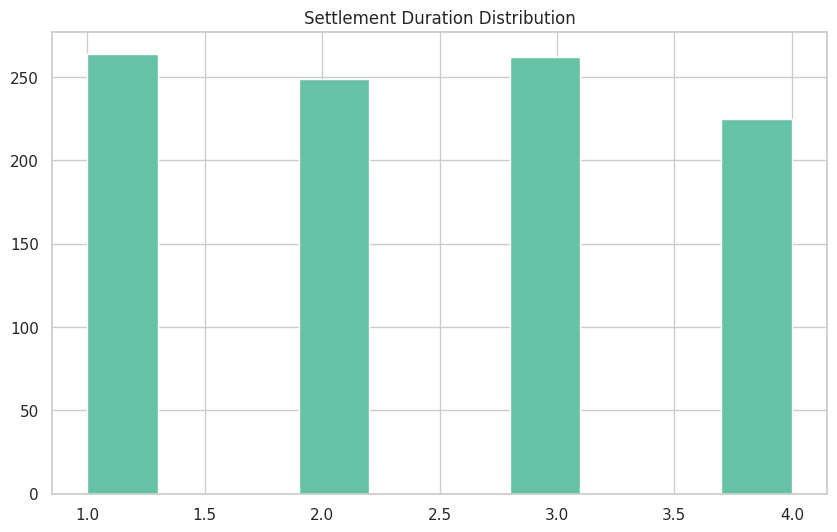

In [53]:
# Export cleaned CSV
df.to_csv('cleaned_trades.csv', index=False)

# Optional: Save charts
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df['SettlementDuration'].hist()
plt.title('Settlement Duration Distribution')
plt.savefig('settlement_duration_chart.png')


In [55]:
from google.colab import files

files.download('cleaned_trades.csv')
files.download('settlement_duration_chart.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>